#### The remainder of the cell's depend on the functions in the following cell

In [104]:
import csv
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.rcParams.update({'font.size': 16})
titlefontsize=28; legendfontsize=23; axisfontsize=20

class lists1():
    def __init__(self):
        self.loop, self.totE, self.potE, self.kinE, self.temp = ([] for i in range(5))
    
    def to_np(self):
        self.loop, self.totE  = np.asarray(self.loop), np.asarray(self.totE) 
        self.potE, self.kinE = np.asarray(self.potE), np.asarray(self.kinE) 
        self.temp = np.asarray(self.temp)
        
class lists2():
    def __init__(self):
        self.loop, self.totE, self.potE, self.kinE, self.temp = ([] for i in range(5))
        self.strn, self.lghst, self.rghst = ([] for i in range(3))
    
    def to_np(self):
        self.loop, self.totE  = np.asarray(self.loop), np.asarray(self.totE) 
        self.potE, self.kinE = np.asarray(self.potE), np.asarray(self.kinE) 
        self.temp, self.strn = np.asarray(self.temp), np.asarray(self.strn)
        self.lghst, self.rghst = np.asarray(self.lghst), np.asarray(self.rghst)

def getrows(filenames, lists_objects, loops):
    results = []
    if(len(filenames) != len(lists_objects)): raise ValueError('len(files) != len(class objects)')
    for f, o in zip(filenames, lists_objects):
        with open(f + '.csv', 'r') as csvfile:
            rows = csv.reader(csvfile, delimiter='\t')
            next(rows) # skipping headings
            for i, r in enumerate(rows):
                if(i==loops): break;
                if isinstance(o, lists2): 
                    o.strn.append(float(r[5])); o.lghst.append(float(r[6])); 
                    o.rghst.append(float(r[7]))
                o.loop.append(float(r[0])); o.totE.append(float(r[1]))
                o.potE.append(float(r[2])); o.kinE.append(float(r[3]))
                o.temp.append(float(r[4]))
            results.append(o)
  
    for result in results: result.to_np()
    return results                 

def getnbatoms(pattern):
    result = []
    for f in list(glob.glob(pattern + '.xyz')):
        print(f)
        with open(f, 'r') as csv_file:
            rows=list(csv.reader(csv_file, delimiter='\t'))
            result.append(int(rows[0][0]))
    return result
            
def getproperty(pattern, loop):
    result = []
    for f in list(glob.glob(pattern + '.csv')):
        with open(f, 'r') as csv_file:
            rows=list(csv.reader(csv_file, delimiter='\t'))
            result.append(int(rows[loop][1])) # loop is position of property in csv
    return result

## m4: LJ Potential

#### m4: Plot - Energy Vs Time

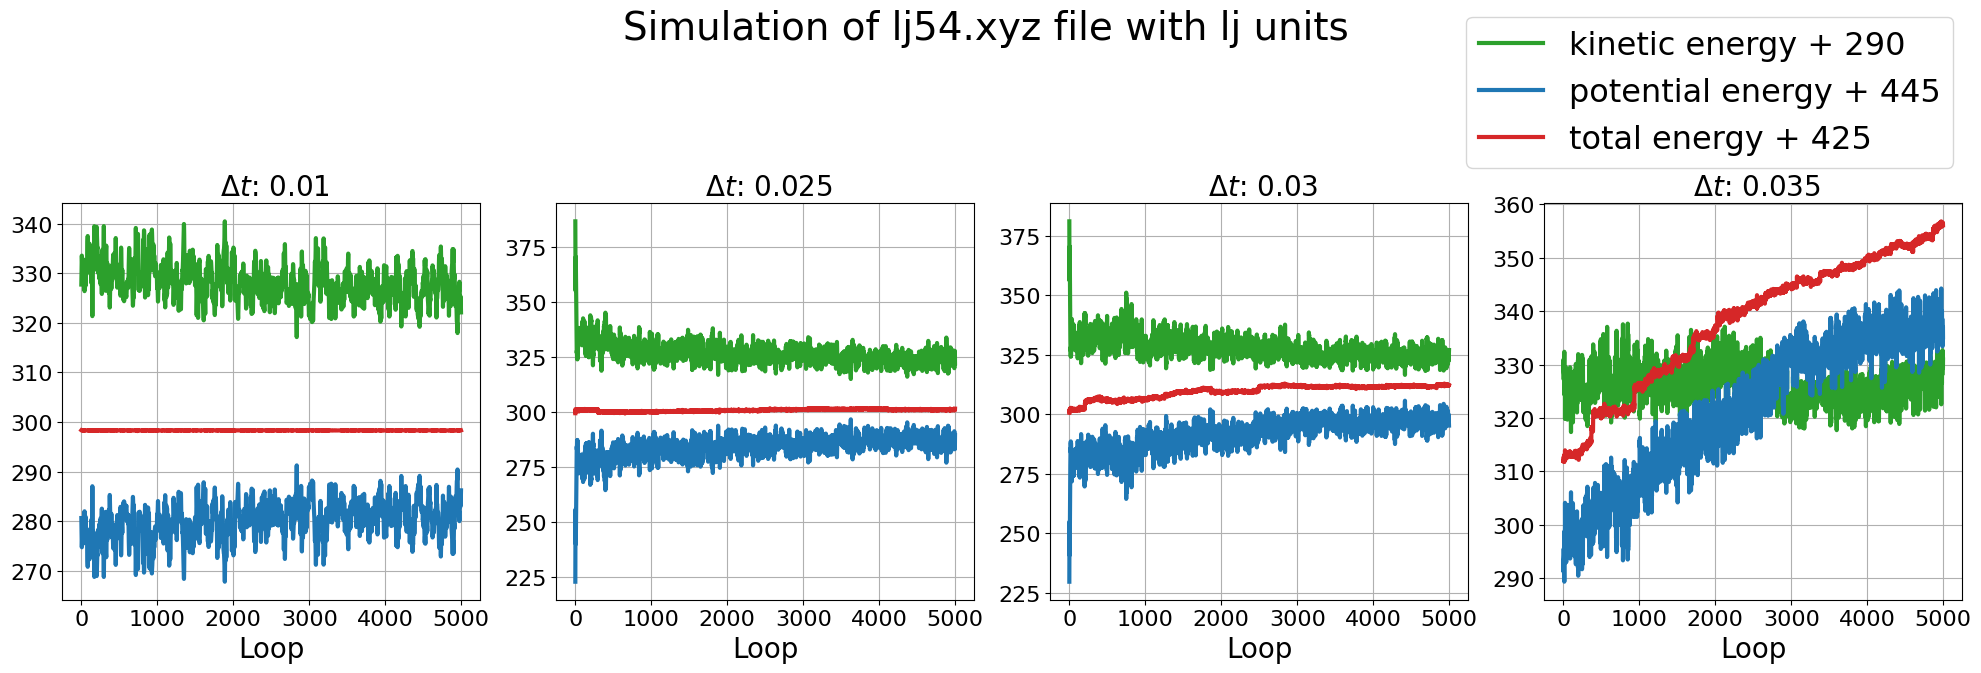

In [105]:
dt = [0.010, 0.025, 0.030, 0.035]

v = getrows(['m4/lj54_0.010', 'm4/lj54_0.025', 'm4/lj54_0.030', 'm4/lj54_0.035'], 
            [lists1(), lists1(), lists1(), lists1()], 5000); pos=1   

fig = plt.figure(figsize=(20,6))
fig.suptitle('Simulation of lj54.xyz file with lj units', fontsize=titlefontsize, 
             x=0.5, y=1.13)

for itx in range(4):

    ax = plt.subplot(1,4,pos); ax.grid(True); pos+=1

    ax.set_title(r" $\Delta t$: {}".format(dt[itx]), fontsize=axisfontsize)

    ax.set_xlabel('Loop', fontsize=axisfontsize)

    KE, = ax.plot(v[itx].loop, v[itx].kinE + 290, 
                  lw = 3, c = 'tab:green', label = "kinetic energy")
    PE, = ax.plot(v[itx].loop, v[itx].potE + 445, 
                  lw = 3, c = 'tab:blue', label = "potential energy")
    TE, = ax.plot(v[itx].loop, v[itx].totE+ 425, 
                  lw = 3, c = 'tab:red', label = "total energy")
        
fig.legend([KE, PE, TE], 
           ['kinetic energy + 290', 'potential energy + 445', 'total energy + 425'],
           loc = (0.74, 0.75), fontsize=legendfontsize, ncol=1)

plt.tight_layout()
plt.savefig('plots/timesteps.png', bbox_inches='tight'); plt.show()

#### m4: Plot - Lennard Jones Plots

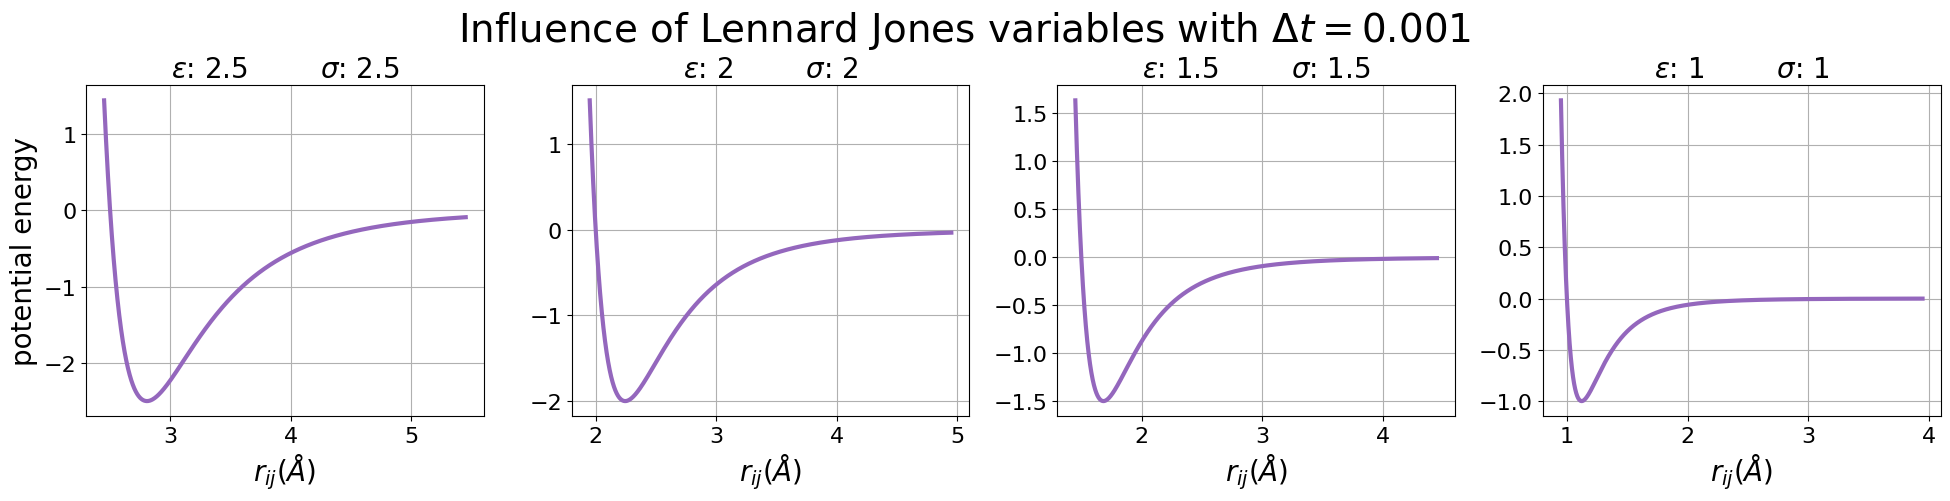

In [106]:
epsilon, sigma, pos = [2.5, 2, 1.5, 1], [2.5, 2, 1.5, 1], 1

v = getrows(['m4/lj2_E_2.500_S_2.500_dt_0.001', 'm4/lj2_E_2.000_S_2.000_dt_0.001',
             'm4/lj2_E_1.500_S_1.500_dt_0.001', 'm4/lj2_E_1.000_S_1.000_dt_0.001',], 
            [lists1(), lists1(), lists1(), lists1()], 6000)

fig = plt.figure(figsize=(20,5.5))
fig.suptitle(r'Influence of Lennard Jones variables with $\Delta t = 0.001$', 
             fontsize=titlefontsize, y=0.92)

for itx in range(4):
    ax = plt.subplot(1,4,pos); ax.grid(True); pos+=1

    ax.set_title(r"$\varepsilon$: {} $\qquad$ $\sigma$: {}"
                 .format(epsilon[itx], sigma[itx]), fontsize=axisfontsize)

    ax.set_xlabel(r"$r_{ij} (\AA)$", fontsize=axisfontsize)
    if(itx == 0): ax.set_ylabel('potential energy', fontsize=axisfontsize)

    PE, = ax.plot(np.linspace(sigma[itx] - 0.0505, sigma[itx] + 2.95, 6000), 
                  v[itx].potE, linewidth=3, color='tab:purple',
                                              label="potential energy")

plt.tight_layout()
plt.savefig('plots/lj_variables.png', bbox_inches='tight'); plt.show()

#### m4: Figures - 4 different timesteps

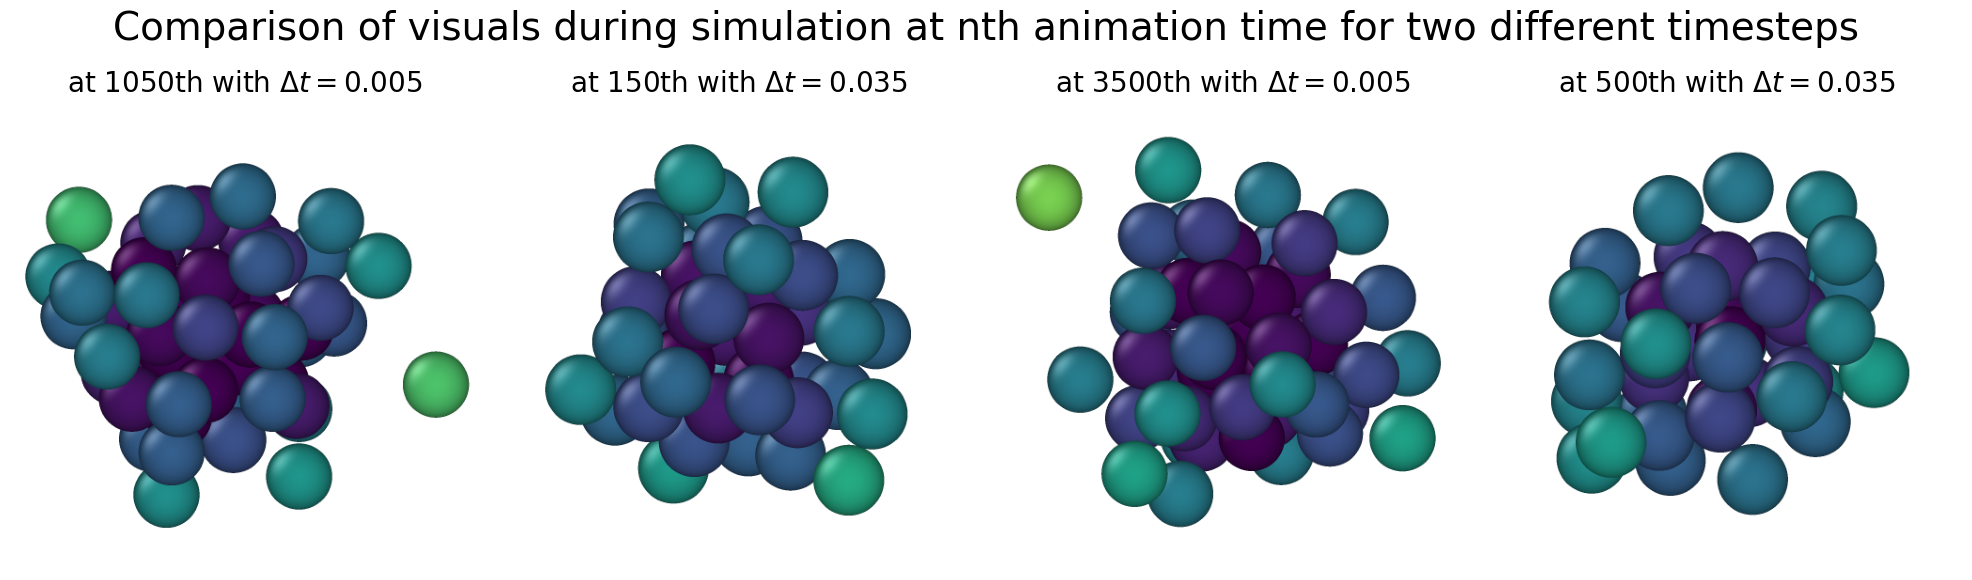

In [107]:
# 51 - 0 viridis x-y axis cutoff radius 4 histogram bins 50
dt, timestep, pos = [0.01, 0.05, 0.1, 0.15], [100, 200, 300, 400], 1

titles = [r"at 1050th with $\Delta t = 0.005$", r"at 150th with $\Delta t = 0.035$", 
          r"at 3500th with $\Delta t = 0.005$", r"at 500th with $\Delta t = 0.035$"]

# m4/images/lj54_0.035_150.png lj54_0.035_500.png
names = ['m4/images/lj54_0.005_1050.png', 'm4/images/lj54_0.035_150.png', 
         'm4/images/lj54_0.005_3500.png', 'm4/images/lj54_0.035_500.png']

fig = plt.figure(figsize=(20,7))
fig.suptitle('Comparison of visuals during simulation at nth animation time \
for two different timesteps', fontsize=titlefontsize, y=0.92)

for itx in range(4):
        ax = plt.subplot(1,4,pos); ax.axis('off'); pos+=1
        
        ax.set_title(titles[itx], fontsize=axisfontsize)
        
        ax.imshow(mpimg.imread(names[itx]))
        
plt.tight_layout()
plt.savefig('plots/lj_visuals.png', bbox_inches='tight'); plt.show()

## m6: LJ with neighbour list

#### m5+m6: Plot - time vs no. of atoms with neighbour list

m6/ljCubeNL_2744.xyz
m6/ljCubeNL_3375.xyz
m6/ljCubeNL_4096.xyz
m6/ljCubeNL_4913.xyz
m6/ljCubeNL_5832.xyz
m6/ljCubeNL_6859.xyz
m6/ljCubeNL_8000.xyz
m6/ljCubeNL_9261.xyz


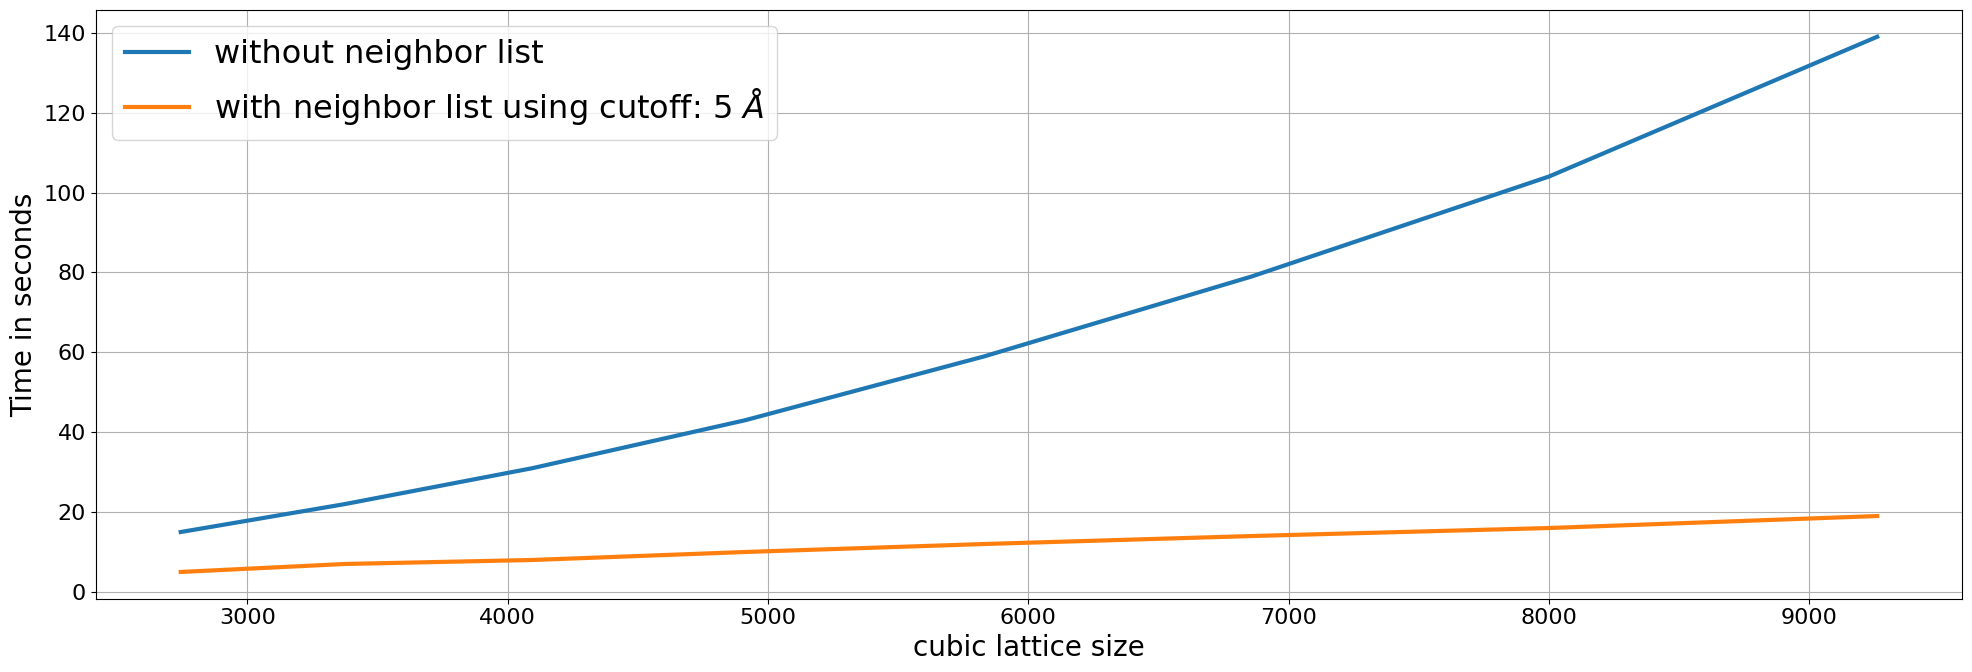

In [108]:
nbatoms = getnbatoms('m6/*_????')
etimes = [getproperty('m6/*_????', 21), getproperty('m5/*_????',21)]

fig = plt.figure(figsize=(20, 7)); plt.grid(True)

plt.xlabel('cubic lattice size', fontsize = axisfontsize)
plt.ylabel('Time in seconds', fontsize = axisfontsize)

plt.plot(nbatoms, etimes[1], lw = 3, label = 'without neighbor list')
plt.plot(nbatoms, etimes[0], lw = 3, label = r"with neighbor list using cutoff: 5 $\AA$")

plt.legend(fontsize = legendfontsize)
plt.tight_layout()
plt.savefig('plots/nl_comparison.png', bbox_inches='tight'); plt.show()

## m7: gupta potential

#### m7: Plots - total energy vs temperature (note: check this in m8 for different cluster sizes. if different then make plot)

/home/hari/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/hari/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/hari/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/hari/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


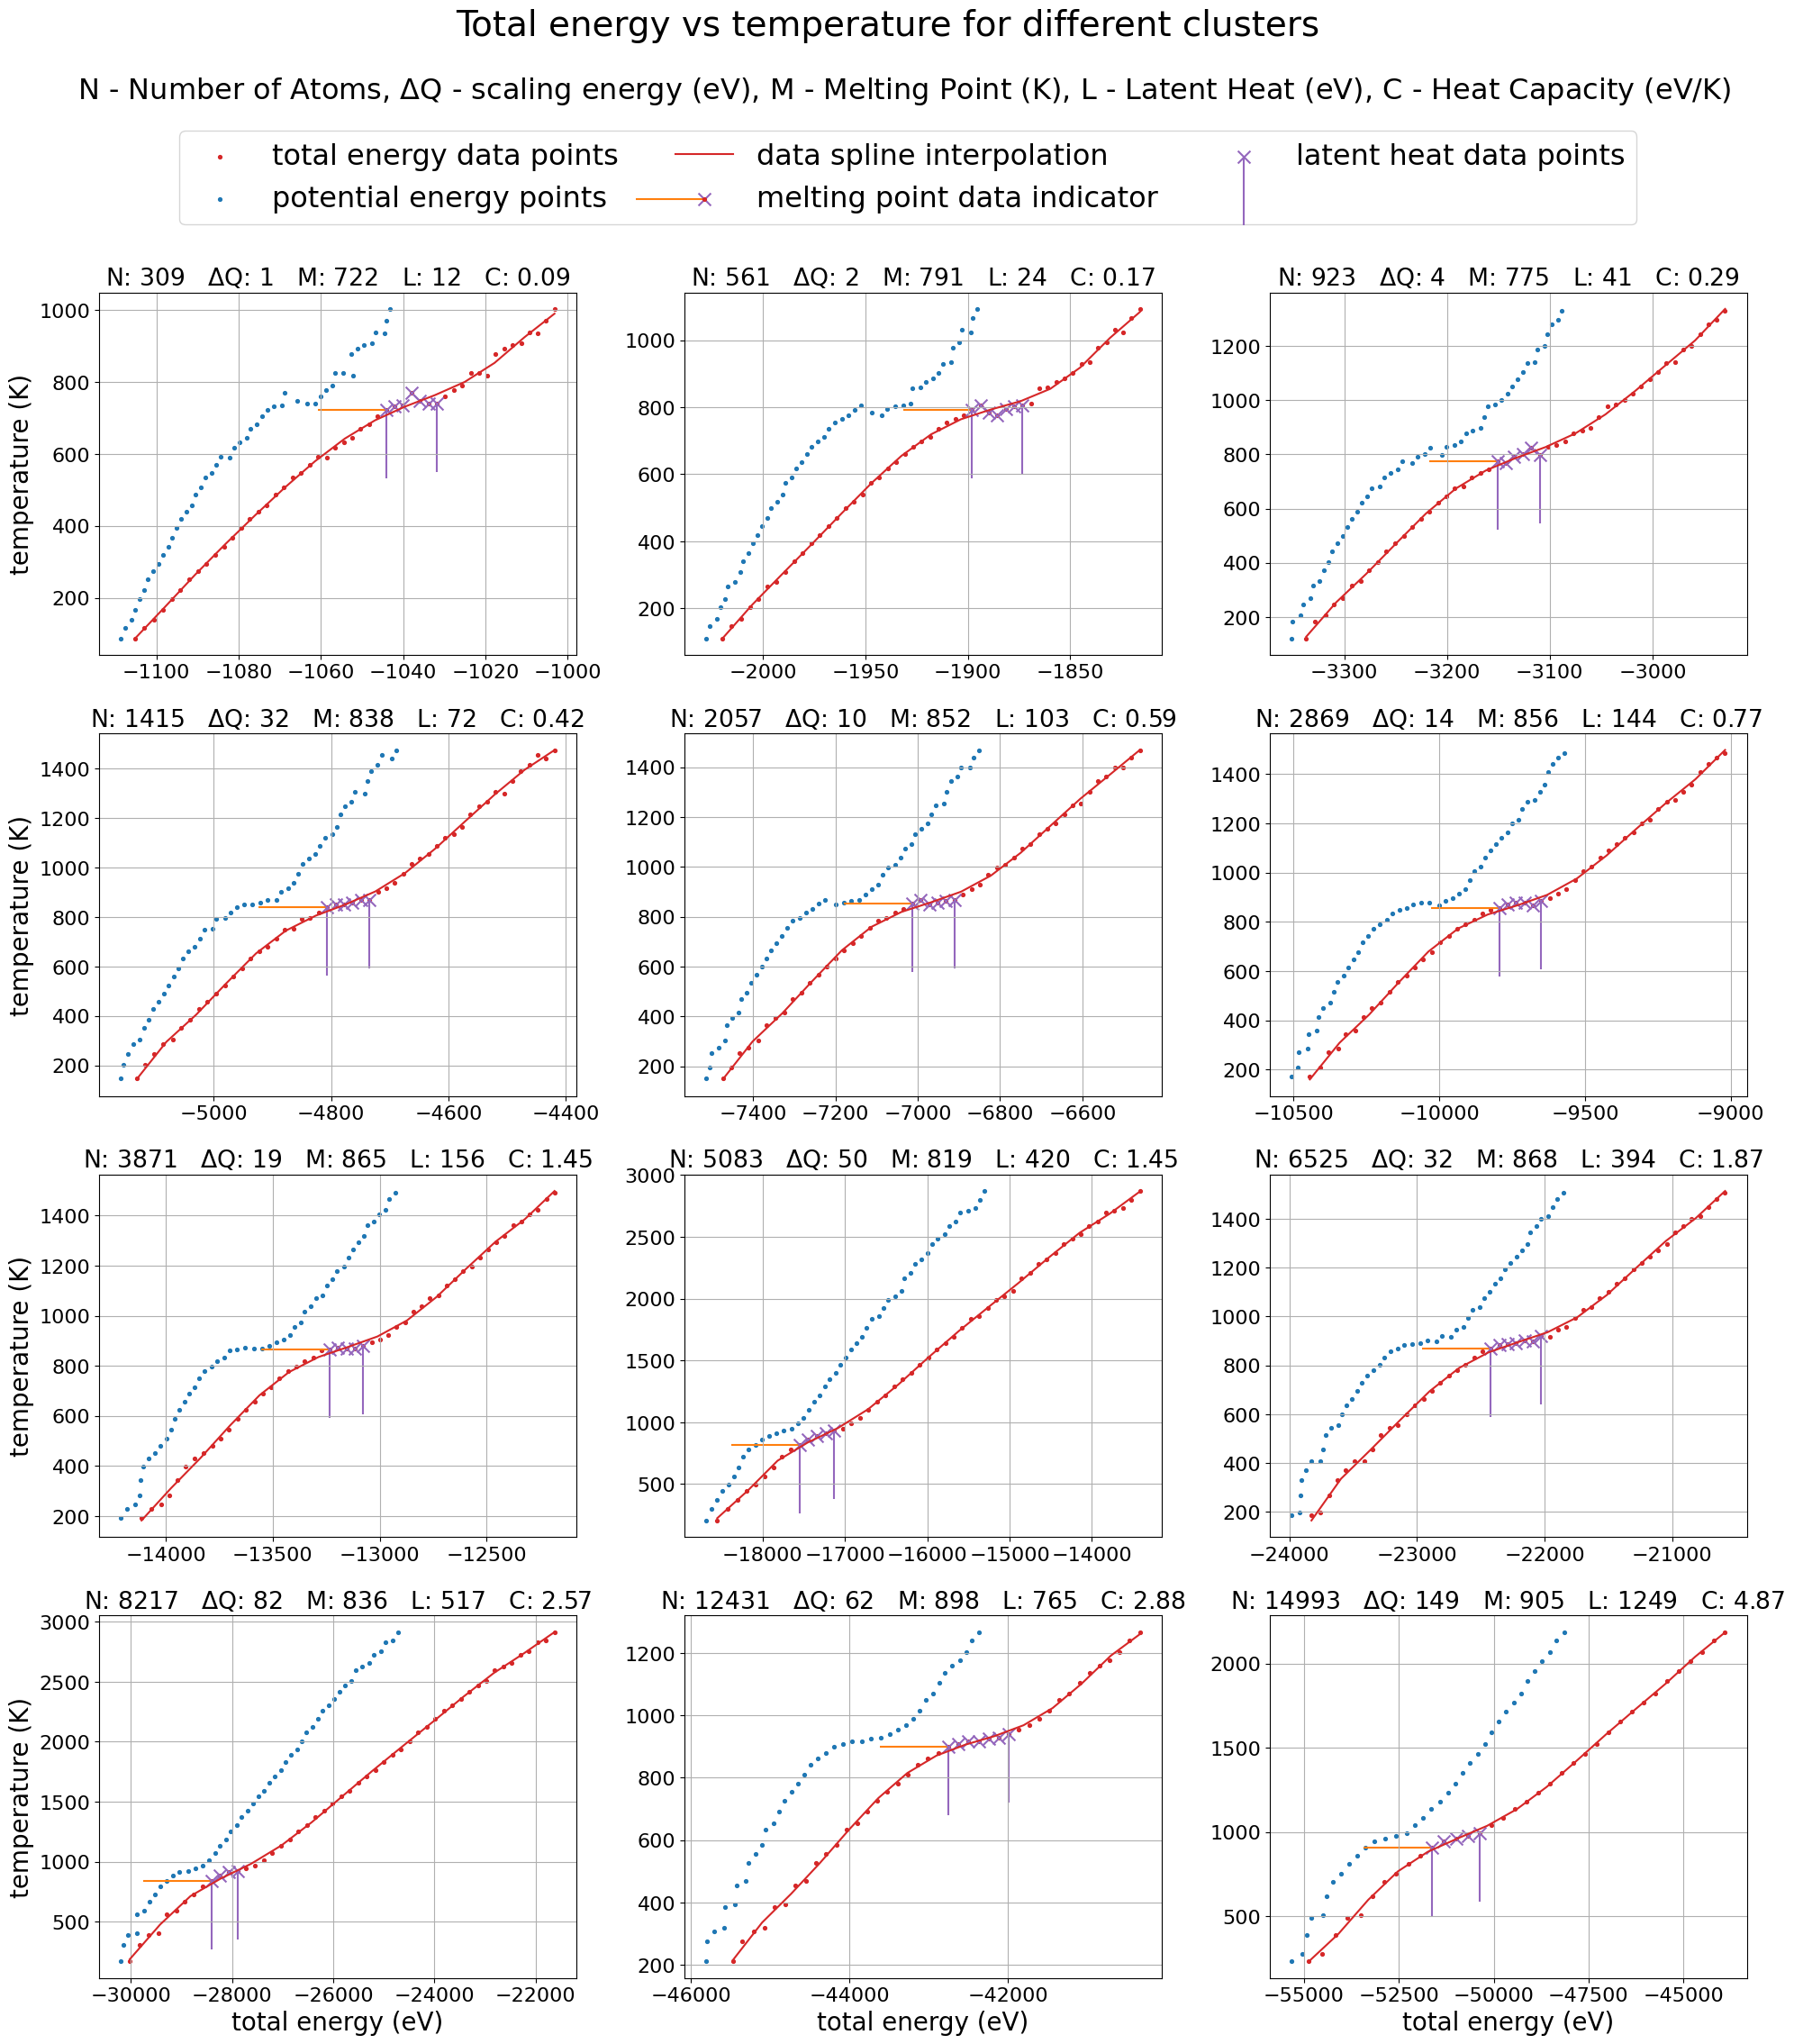

In [137]:
atoms = [309, 561, 923, 1415, 2057, 2869, 3871, 5083, 6525, 8217, 12431, 14993]
dQ = [1, 2,  4, 32, 10, 14, 19, 50, 32, 82, 62, 149]
mpl, lhl, hcl, pos = [], [], [], 1

v = getrows(['m7/gptaCluster_309',    # 4 
             'm7/gptaCluster_561',    # 5
             'm7/gptaCluster_923',    # 6
             'm7/gptaCluster_1415',   # 7
             'm7/gptaCluster_2057',   # 8
             'm7/gptaCluster_2869',   # 9
             'm7/gptaCluster_3871',   # 10
             'm7/gptaCluster_5083',   # 11
             'm7/gptaCluster_6525',   # 12
             'm7/gptaCluster_8217',   # 13
             # 'm7/gptaCluster_10179', # 14
             'm7/gptaCluster_12431',  # 15
             'm7/gptaCluster_14993'], # 16 
            [lists1(), lists1(), lists1(), lists1(), 
             lists1(), lists1(), lists1(), lists1(),
             lists1(), lists1(), lists1(), lists1()], 12499)

l_ht = [[29, 36], [29, 36], [22, 28], # 4,5,6
        [22, 28], [22, 28], [22, 28], # 7,8,9
        [22, 27], [ 9, 14], [21, 28], # 10,11,12
        [ 9, 13], [21, 28], [10, 15]] # 13,15,16                   

fig = plt.figure(figsize=(20,25))
fig.suptitle('Total energy vs temperature for different clusters', 
             fontsize=titlefontsize, y=1.08)
textstr = "N - Number of Atoms, $\Delta$Q - scaling energy (eV), \
M - Melting Point (K), L - Latent Heat (eV), C - Heat Capacity (eV/K)"
fig.text(0.05, 1.04, textstr, fontsize=legendfontsize)


for itx in range(12):
    ax = plt.subplot(5,3,pos); ax.grid(True); pos+=1
    
    if(itx%3 == 0): ax.set_ylabel('temperature (K)', fontsize=axisfontsize)
    if(itx>8): ax.set_xlabel('total energy (eV)', fontsize=axisfontsize)
    ax.locator_params(axis='x', nbins=6)
    ax.locator_params(axis='y', nbins=8)
        
    # Collect 50 datapoints after each 250 steps to remove peaks created by
    # velocity scaling.
    lb, ub = 198, 248
    avgtemp, avgtotE, avgpotE = [], [], []
    while True:
        if ub > 99992: break
        avgtemp.append(np.average(v[itx].temp[lb:ub]))
        avgtotE.append(np.average(v[itx].totE[lb:ub]))
        avgpotE.append(np.average(v[itx].potE[lb:ub]))
        lb += 250; ub += 250
    avgtemp, avgtotE, avgpotE = np.array(avgtemp), np.array(avgtotE), np.array(avgpotE)
    avgtemp, avgtotE = avgtemp[np.isfinite(avgtemp)], avgtotE[np.isfinite(avgtotE)]
    avgpotE = avgpotE[np.isfinite(avgpotE)]
    
    # Calculating spline equation.
    x, y, zz = avgtotE, avgtemp, avgpotE
    z = np.polyfit(x,y,8)
    f = np.poly1d(z)
    xn = np.linspace(x[0], x[-1], 15)
    yn = f(xn)
    
    # calculating properties.
    mx,my = x[l_ht[itx][0]], y[l_ht[itx][0]] 
    lx_x, ly_y = x[l_ht[itx][0]:l_ht[itx][1]], y[l_ht[itx][0]:l_ht[itx][1]]
    lx_l, ly_l = [x[l_ht[itx][0]], x[l_ht[itx][1] - 1]], [y[l_ht[itx][0]], y[l_ht[itx][1] - 1]] 
    mp, lh = int(my), int(lx_l[1] - lx_l[0])
    x1, y1, x2, y2 = x[5], y[5], x[8], y[8]
    hc  = round((x2-x1)/(y2-y1), 2)
    
    ax.set_title(r"N: {}   $\Delta$Q: {}   M: {}   L: {}   C: {}"
                 .format(atoms[itx], dQ[itx], mp, lh, hc), y=1)
    
    data = ax.scatter(x, y, marker='.', c='tab:red', s=30)
    potential = ax.scatter(zz, y, marker='.', c='tab:blue', s=30)
    spline, = ax.plot(xn, yn, c='tab:red')
    mpt = ax.scatter(mx, my, marker=0, c='tab:orange', s=3000)
    ltht = ax.scatter(lx_x, ly_y, marker='x', c='tab:purple', s=100)
    ltht1 = ax.scatter(lx_l, ly_l, marker=3, c='tab:purple', s=3000)
            
    mpl.append(mp);lhl.append(lh); hcl.append(hc)

fig.legend([data, potential, spline, (mpt, ltht, data), (ltht, ltht1)],
           ['total energy data points', 'potential energy points' ,'data spline interpolation', 
            'melting point data indicator','latent heat data points'], loc=(0.1, 0.89), 
           fontsize=legendfontsize, ncol=3)


plt.tight_layout()
plt.savefig('plots/clusters.png', bbox_inches='tight'); plt.show()

#### m7: Plots - melting point, latent heat, heat capacity vs cluster size (run m7: total Energy vs Temperature plot first for collecting data)

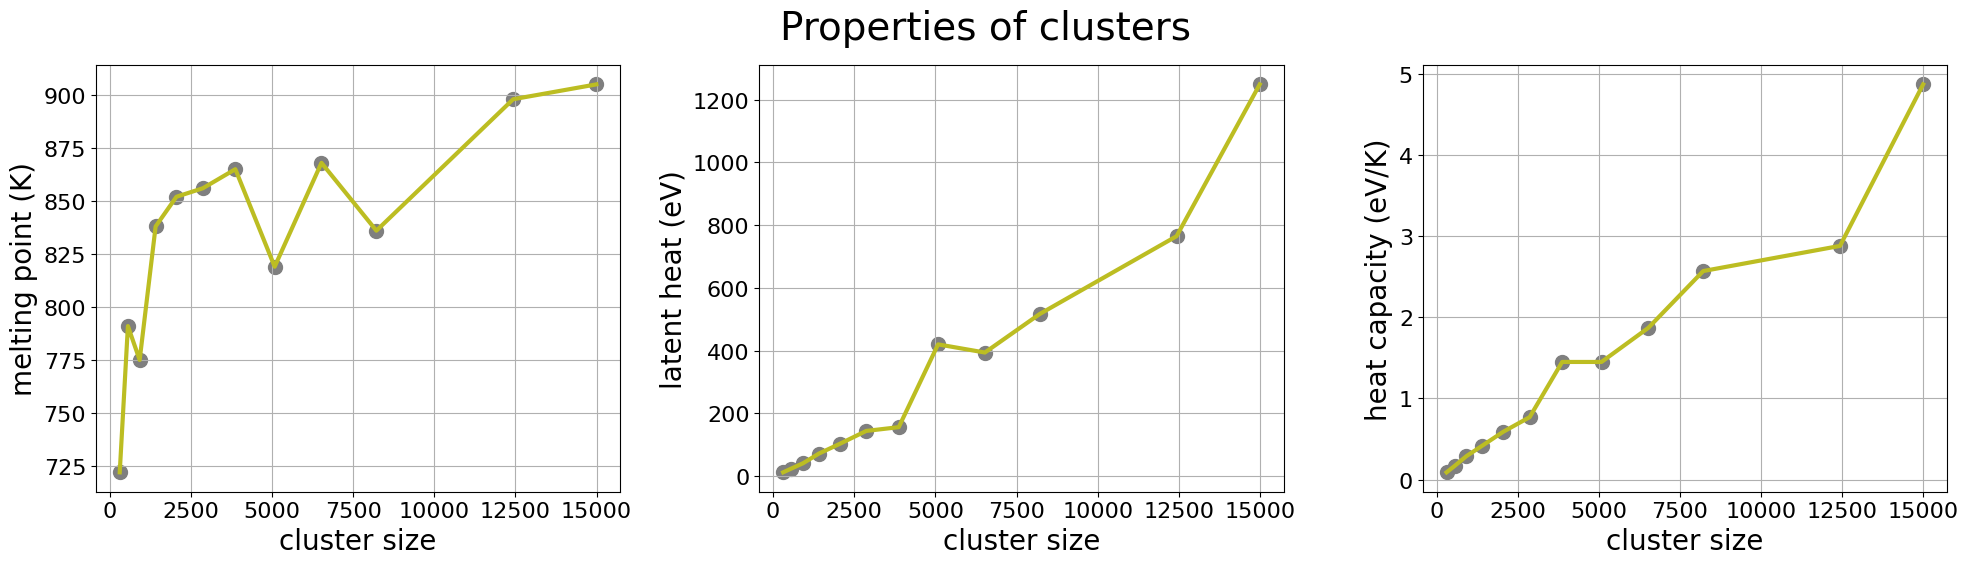

In [110]:
ylabels, pos = ['melting point (K)', 'latent heat (eV)', 'heat capacity (eV/K)'], 1

fig = plt.figure(figsize=(20,6))
fig.suptitle('Properties of clusters', fontsize=titlefontsize, y=0.95)

y = [mpl, lhl, hcl]
for itx in range(3):
        ax = plt.subplot(1,3,pos); ax.grid(True); pos+=1
        
        ax.set_xlabel("cluster size", fontsize=axisfontsize)
        ax.set_ylabel(ylabels[itx], fontsize=axisfontsize)
        
        ax.plot(atoms, y[itx], lw=3, c='tab:olive')
        ax.scatter(atoms, y[itx], s=100, c='tab:grey')
        
plt.tight_layout();
plt.savefig('plots/cluster_properties.png', bbox_inches='tight'); plt.show()

#### m7: Plots - potential energy and kinetic energy vs time

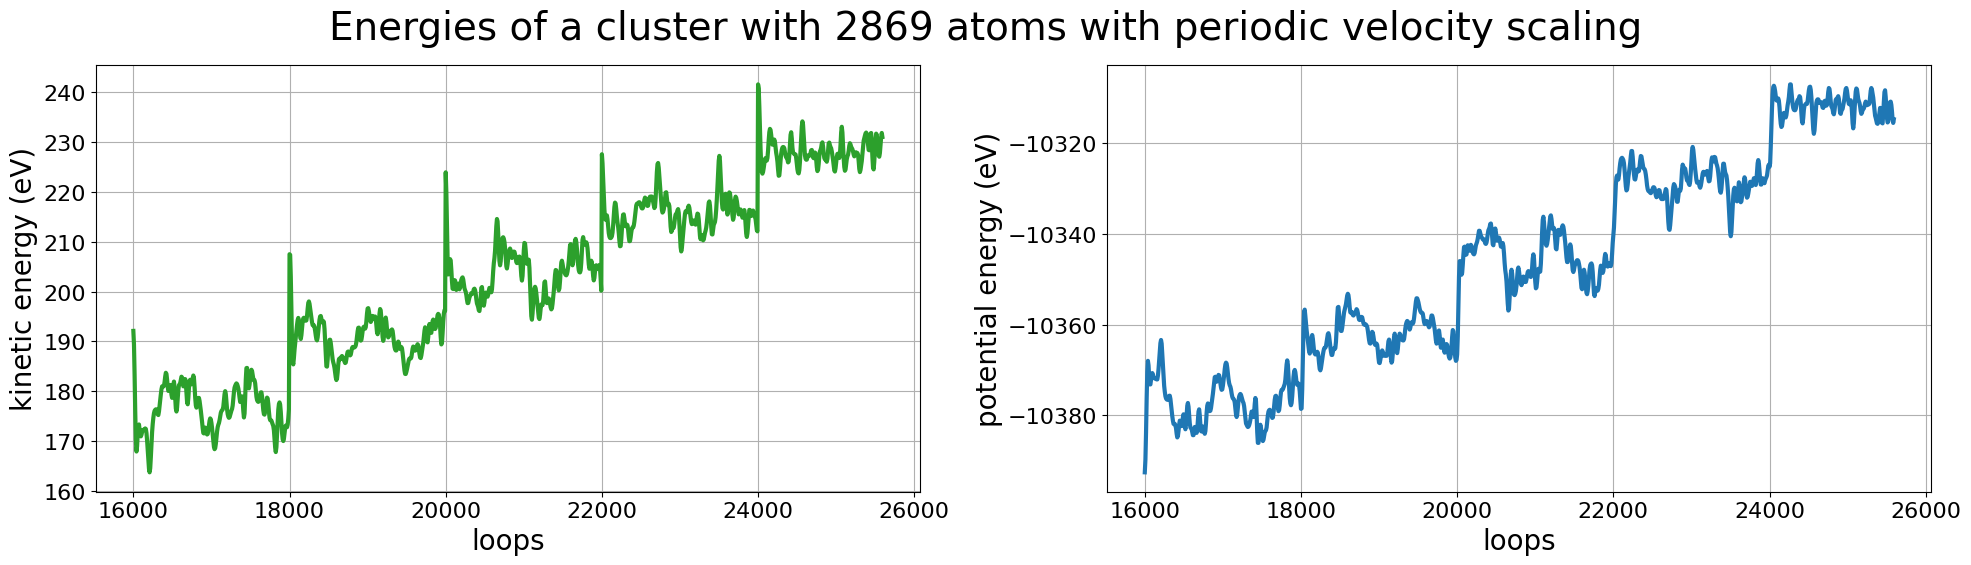

In [111]:
ylabels = ['kinetic energy (eV)', 'potential energy (eV)'] 
color, pos = ['tab:green', 'tab:blue'], 1

v = getrows(['m7/gptaCluster_2869'], [lists1()], 12499)

fig = plt.figure(figsize=(20,6))
fig.suptitle('Energies of a cluster with 2869 atoms with periodic velocity scaling', 
             fontsize=titlefontsize, y=0.95)

to_plot = [v[0].loop[2000:3200], v[0].kinE[2000:3200], v[0].potE[2000:3200]]

for itx in range(2):
        ax = plt.subplot(1,2,pos); ax.grid(True); pos+=1
        
        ax.set_xlabel('loops', fontsize=axisfontsize)
        ax.set_ylabel(ylabels[itx], fontsize=axisfontsize)
        
        ax.plot(to_plot[0], to_plot[itx+1], lw = 3, c = color[itx]) #2869
        
plt.tight_layout()
plt.savefig('plots/cluster_energies.png', bbox_inches='tight'); plt.show()

#### m7: solid to molten

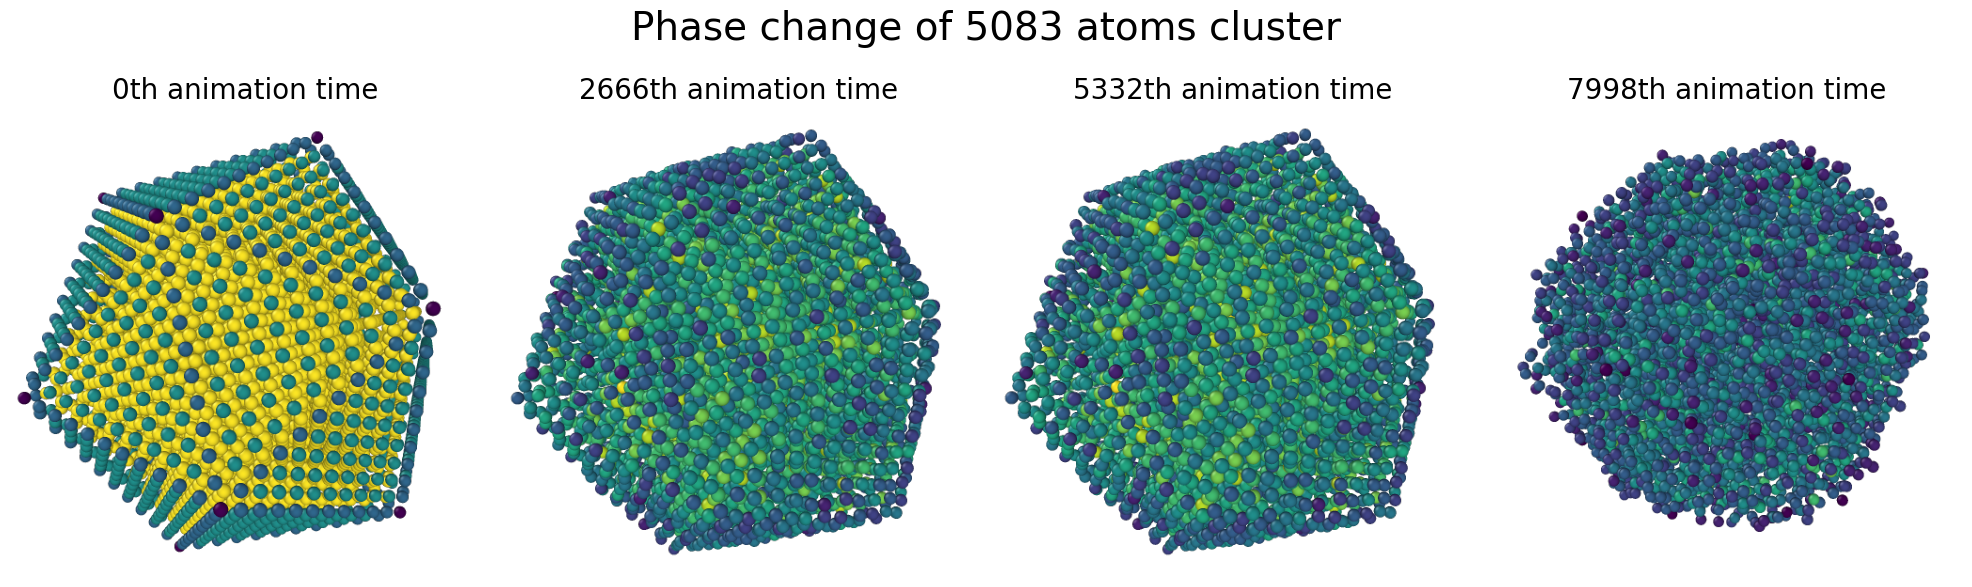

In [112]:
pos = 1

titles = ['0th animation time', '2666th animation time', 
          '5332th animation time', '7998th animation time']

# m4/images/lj54_0.035_150.png lj54_0.035_500.png
names = ['m7/images/cluster_0000.png', 'm7/images/cluster_2666.png', 
         'm7/images/cluster_2666.png', 'm7/images/cluster_7998.png']

fig = plt.figure(figsize=(20,7))
fig.suptitle('Phase change of 5083 atoms cluster', fontsize=titlefontsize, y=0.93)

for itx in range(4):
        ax = plt.subplot(1,4,pos); ax.axis('off'); pos+=1
        
        ax.set_title(titles[itx], fontsize=axisfontsize)
        
        ax.imshow(mpimg.imread(names[itx]))
        
plt.tight_layout()
plt.savefig('plots/cluster_visuals.png', bbox_inches='tight'); plt.show()

## m8: Parallelization

#### m7 + m8: total energy vs time

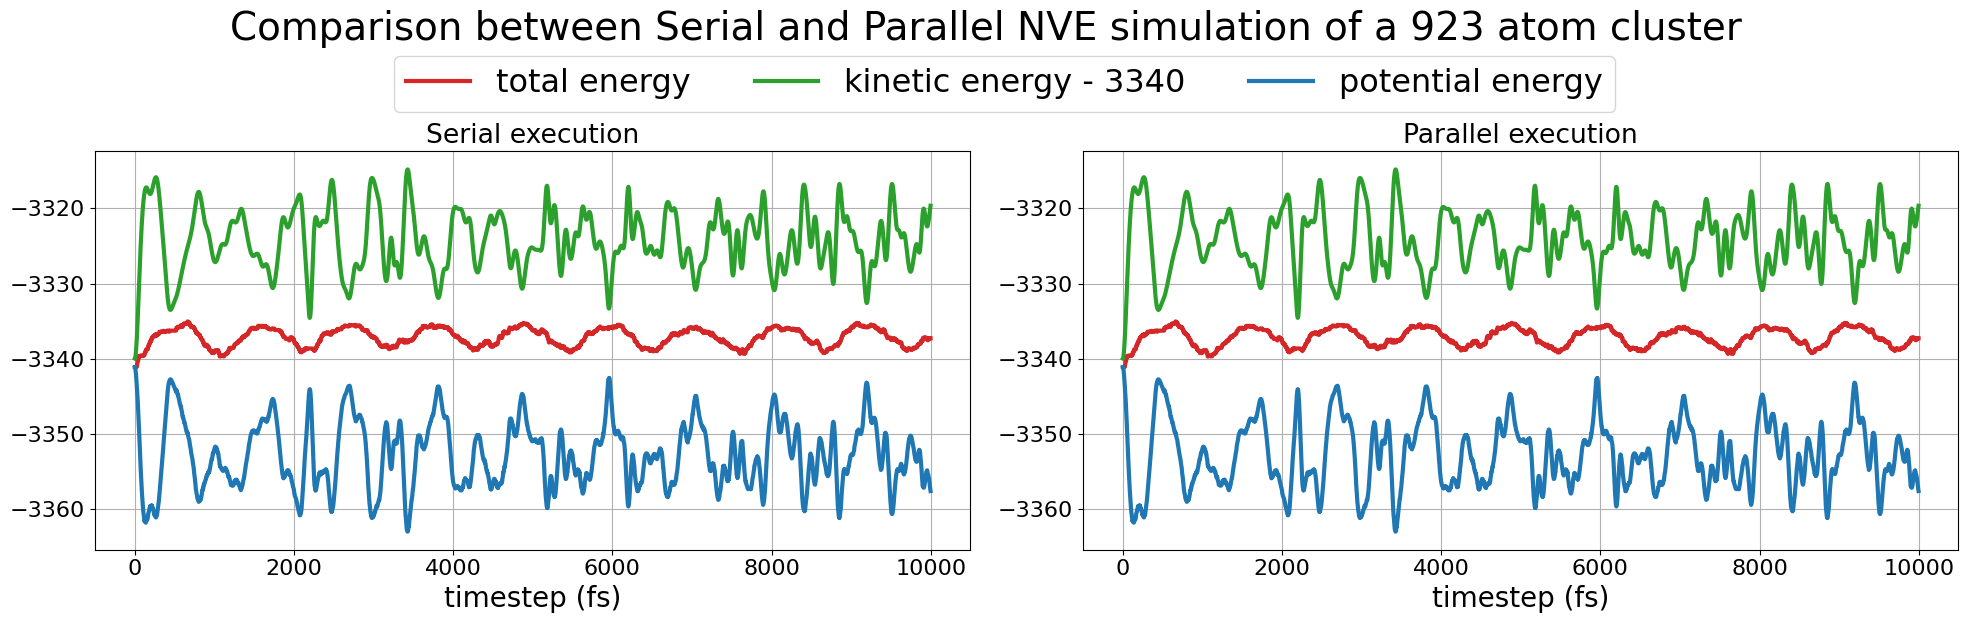

In [113]:
v = getrows(['m7/gptaCluster-econs_923', 'm8/cluster_parallel_923'], 
            [lists1(), lists1()], 5000)   
titles, pos = ["Serial execution", "Parallel execution"], 1

fig = plt.figure(figsize=(20,6))
fig.suptitle('Comparison between Serial and Parallel NVE simulation of a 923 atom cluster', 
             fontsize=titlefontsize, y=1.045)

for itx in range(2):
    ax = plt.subplot(1,2,pos); ax.grid(True); pos+=1

    ax.set_title(titles[itx])

    ax.set_xlabel("timestep (fs)", fontsize=axisfontsize)

    TE, = ax.plot(v[itx].loop * 2, v[itx].totE, lw = 3, c = 'tab:red', 
                  label= "total energy")
    PE, = ax.plot(v[itx].loop * 2, v[itx].potE, lw = 3, c = 'tab:blue', 
                  label= "potential energy")
    KE, = ax.plot(v[itx].loop * 2, v[itx].kinE - 3340, lw = 3, c = 'tab:green', 
                  label= "kinetic energy")
        
fig.legend([TE, KE, PE], ['total energy','kinetic energy - 3340', 'potential energy'],
           loc=(0.20, 0.82), fontsize=legendfontsize, ncol=5)

plt.tight_layout()
plt.savefig('plots/p_comparison.png', bbox_inches='tight'); plt.show()

## m9: Pulling a gold nanowire

### 3 sizes $\times$ 3 temperatures = 9 configurations

#### m9: Plots - force curves (smooth and with noise)

0 0 0
0 1 1
0 2 2
1 2 3
1 3 4
2 4 6
3 6 9
3 7 10
3 8 11
4 10 14
5 10 15
5 12 17
6 12 18
6 13 19
6 14 20
7 15 22
7 16 23
8 16 24
8 17 25
8 18 26


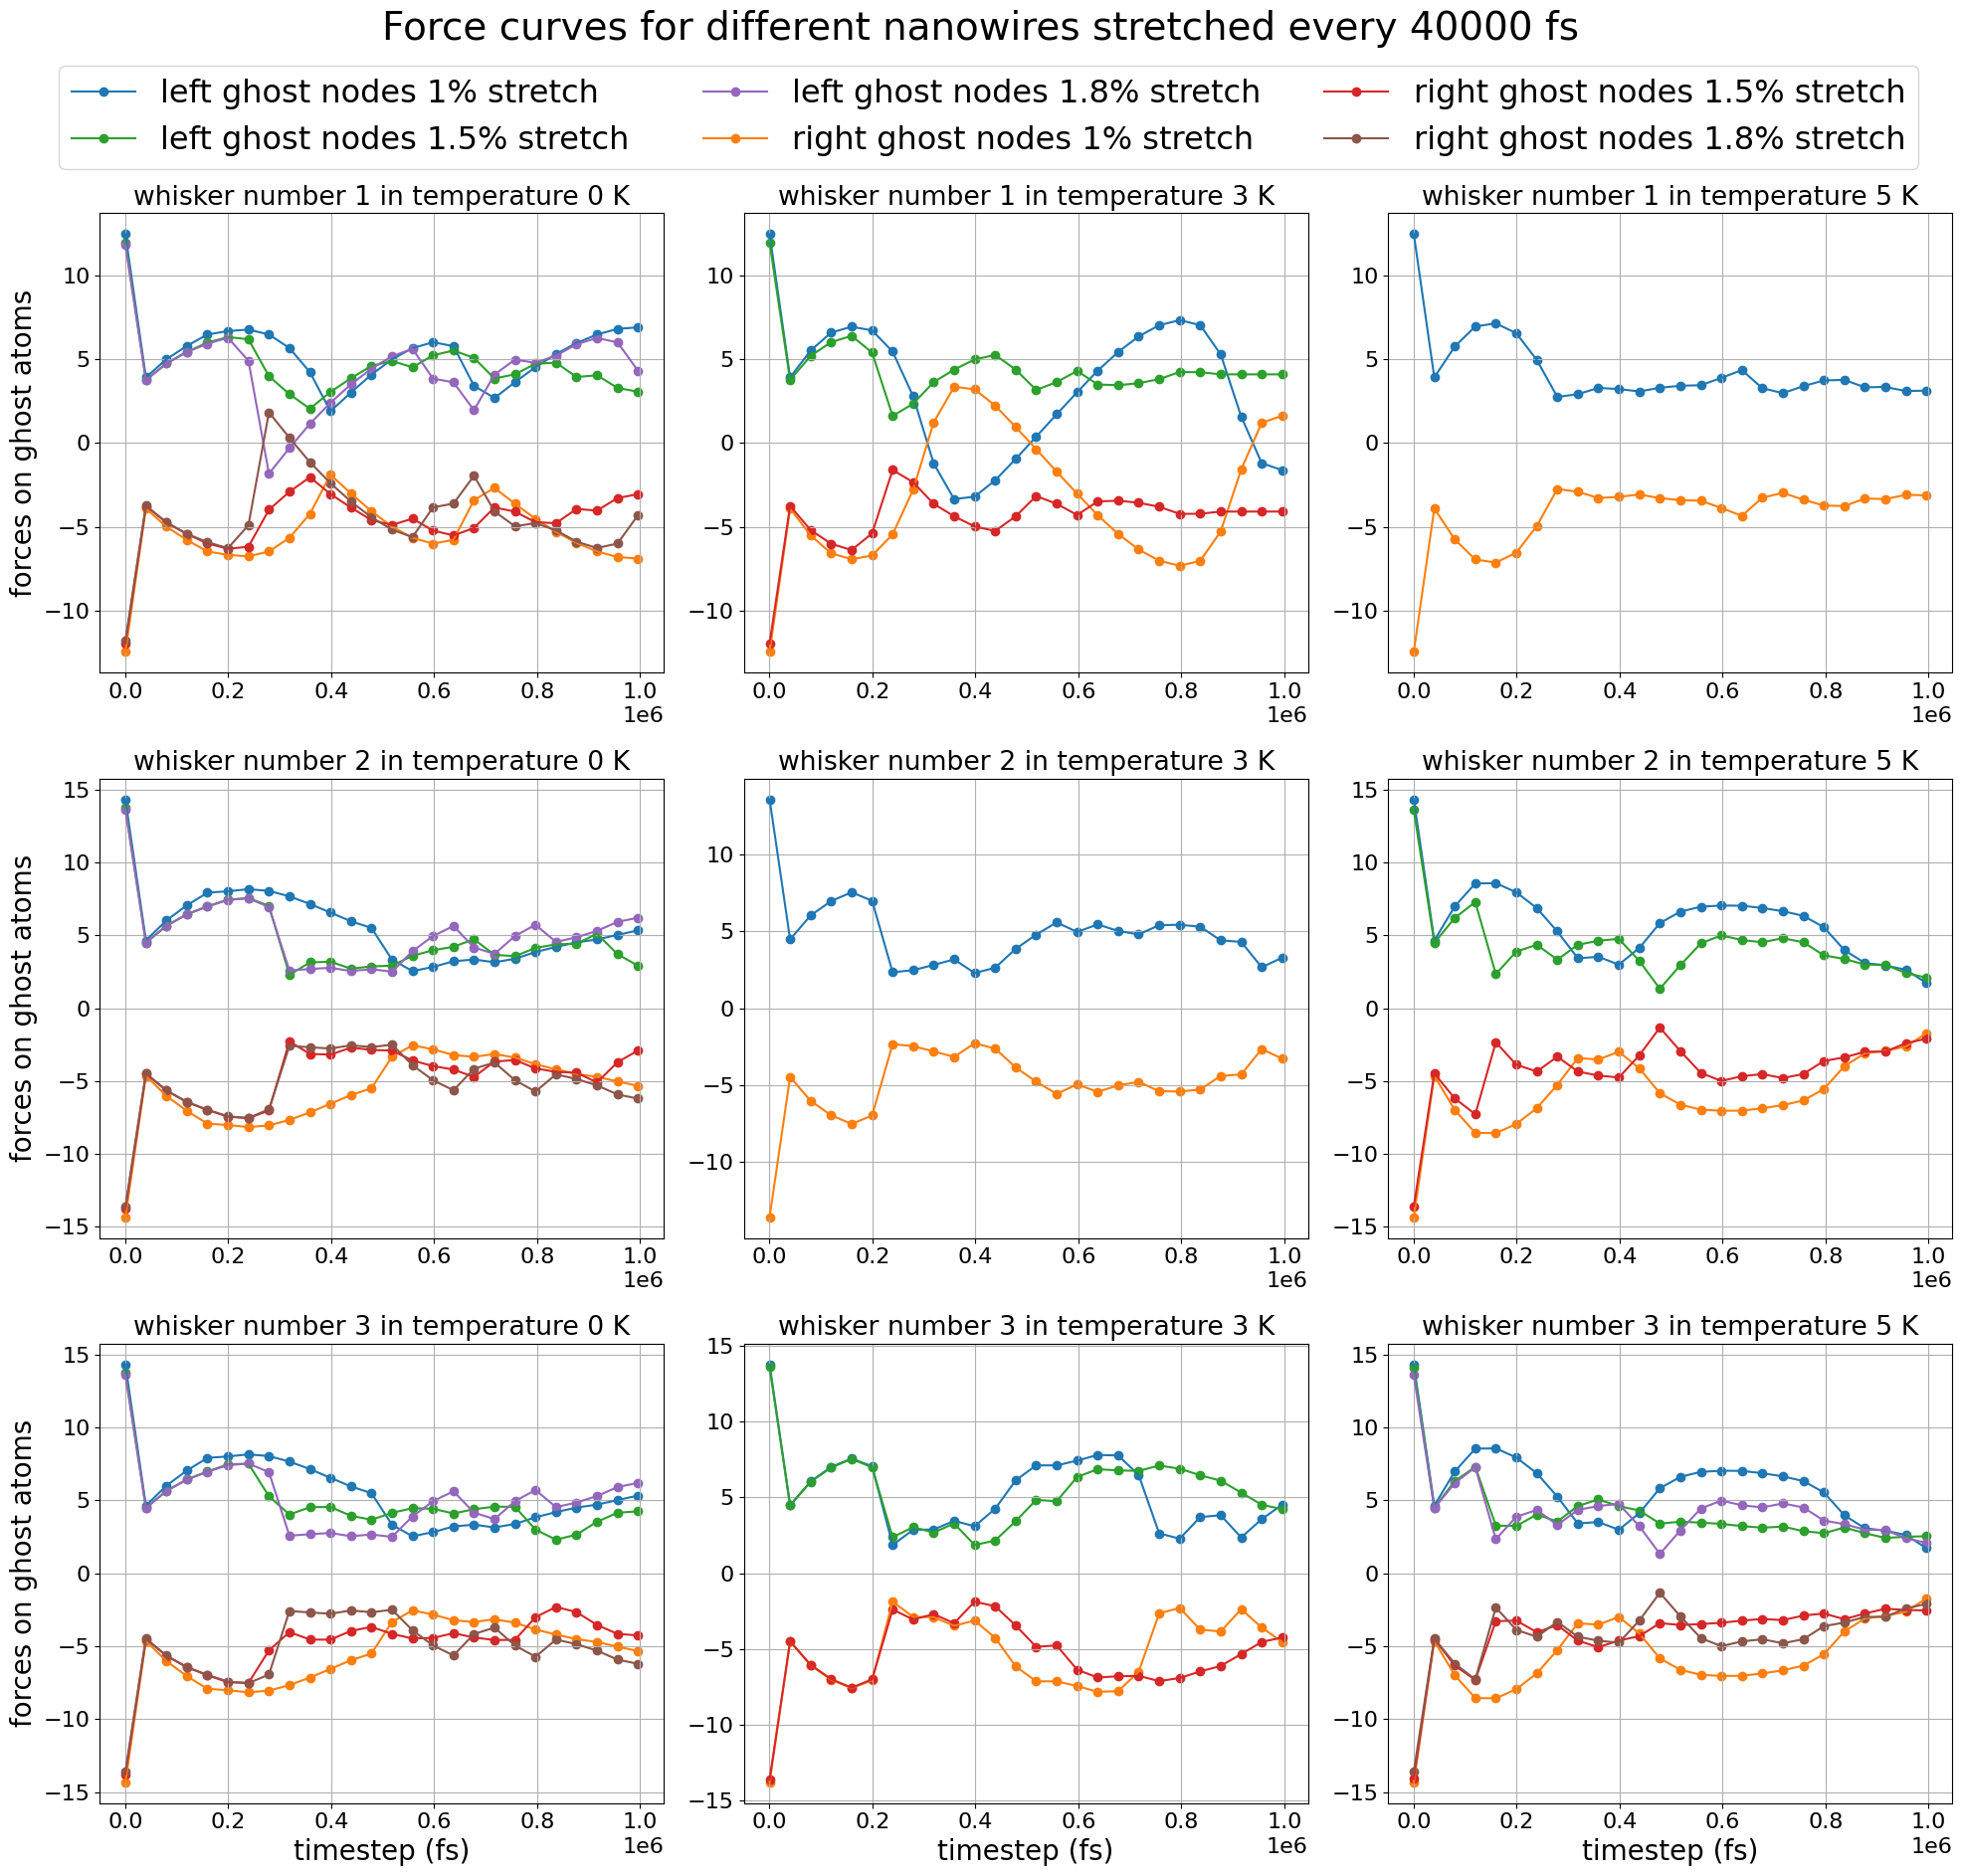

In [114]:
whisker, temps, pos = [1, 2, 3], [0, 3, 5], 1
lgc, rgc = ['#421E22', '#58A6A6', '#D9514EFF'], ['#BC0E4C', '#354F60', '#2DA8D8FF']

fig = plt.figure(figsize=(20,18))
fig.suptitle("Force curves for different nanowires stretched every 40000 fs", 
             fontsize=titlefontsize, y=1.05)

# names with comments are only placeholders and are not used in the final plot.
v = getrows(['m9/whisker_parallel_1000_DLM_0.010_T_0',
             'm9/whisker_parallel_1000_DLM_0.010_T_3',
             'm9/whisker_parallel_1000_DLM_0.010_T_5',
             'm9/whisker_parallel_1000_DLM_0.015_T_0',
             'm9/whisker_parallel_1000_DLM_0.015_T_3',
             'm9/whisker_parallel_1000_DLM_0.015_T_3', # 'm9/whisker_parallel_1000_DLM_0.015_T_5', 
             'm9/whisker_parallel_1000_DLM_0.018_T_0',
             'm9/whisker_parallel_1000_DLM_0.015_T_3', # 'm9/whisker_parallel_1000_DLM_0.018_T_3',
             'm9/whisker_parallel_1000_DLM_0.015_T_3', # 'm9/whisker_parallel_1000_DLM_0.018_T_5',
             
             'm9/whisker_parallel_2560_DLM_0.010_T_0',
             'm9/whisker_parallel_2560_DLM_0.010_T_3',
             'm9/whisker_parallel_2560_DLM_0.010_T_5',
             'm9/whisker_parallel_1000_DLM_0.015_T_3', # 'm9/whisker_parallel_2560_DLM_0.015_T_0',
             'm9/whisker_parallel_1000_DLM_0.015_T_3', # 'm9/whisker_parallel_2560_DLM_0.015_T_3',
             'm9/whisker_parallel_2560_DLM_0.015_T_5',
             'm9/whisker_parallel_2560_DLM_0.018_T_0',
             'm9/whisker_parallel_1000_DLM_0.015_T_3', # 'm9/whisker_parallel_2560_DLM_0.018_T_3',
             'm9/whisker_parallel_2560_DLM_0.018_T_5',
             
             'm9/whisker_parallel_4000_DLM_0.010_T_0',
             'm9/whisker_parallel_4000_DLM_0.010_T_3',
             'm9/whisker_parallel_4000_DLM_0.010_T_5',
             'm9/whisker_parallel_1000_DLM_0.015_T_3', # 'm9/whisker_parallel_4000_DLM_0.015_T_0',
             'm9/whisker_parallel_4000_DLM_0.015_T_3',
             'm9/whisker_parallel_4000_DLM_0.015_T_5',
             'm9/whisker_parallel_4000_DLM_0.018_T_0',
             'm9/whisker_parallel_4000_DLM_0.018_T_3',
             'm9/whisker_parallel_4000_DLM_0.018_T_5'], 
            [lists2(),lists2(),lists2(),lists2(),lists2(),lists2(),lists2(),lists2(),lists2(),
             lists2(),lists2(),lists2(),lists2(),lists2(),lists2(),lists2(),lists2(),lists2(),
             lists2(),lists2(),lists2(),lists2(),lists2(),lists2(),lists2(),lists2(),lists2()], 62400)

with_noise = False # make this variable true to view peaks created from stretching wire.
value, flagged = 0, False
LGP, RGP, LGL, RGL = [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]

for itx in range(9):
    ax = plt.subplot(3,3,pos); ax.grid(True); pos+=1; 
    ax.set_title('whisker number {} in temperature {} K'.format(whisker[int((itx-(itx%3))/3)], 
                                                                temps[itx%3]))

    if(itx%3 == 0): ax.set_ylabel('forces on ghost atoms', fontsize=axisfontsize)
    if(itx>5): ax.set_xlabel('timestep (fs)', fontsize=axisfontsize)

    for i in range(3):
        if (itx+value) in [5, 7, 8, 12, 13, 16, 21]: flagged = True
        if with_noise and not flagged:
            # print(str(itx) + " " + str(value) + " " + str(itx+value))
            LG[i], = ax.plot(v[itx+value].loop, v[itx+value].lghst)
            RG[i], = ax.plot(v[itx+value].loop, v[itx+value].rghst)
            
        if not flagged:
            print(str(itx) + ' ' + str(value) + ' ' + str(itx+value))
            LGL[i], = ax.plot(v[itx+value].loop[::2490] * 2, v[itx+value].lghst[::2490])
            RGL[i], = ax.plot(v[itx+value].loop[::2490] * 2, v[itx+value].rghst[::2490])
            LGP[i]  = ax.scatter(v[itx+value].loop[::2490] * 2, v[itx+value].lghst[::2490])
            RGP[i]  = ax.scatter(v[itx+value].loop[::2490] * 2, v[itx+value].rghst[::2490])
        value+=1; flagged = False
    value-=1 
fig.legend([(LGL[0], LGP[0]), (LGL[1], LGP[1]), (LGL[2], LGP[2]), 
            (RGL[0], RGP[0]), (RGL[1], RGP[1]), (RGL[2], RGP[2])],
           ['left ghost nodes 1% stretch', 'left ghost nodes 1.5% stretch ', 
            'left ghost nodes 1.8% stretch', 'right ghost nodes 1% stretch', 
            'right ghost nodes 1.5% stretch', 'right ghost nodes 1.8% stretch'],
          loc = (0.03, 0.91), fontsize=legendfontsize, ncol=3, scatteryoffsets = [0.5]) 
    
plt.tight_layout()
plt.savefig('plots/forces.png', bbox_inches='tight'); plt.show()

#### m9: Plots - force-strain curves

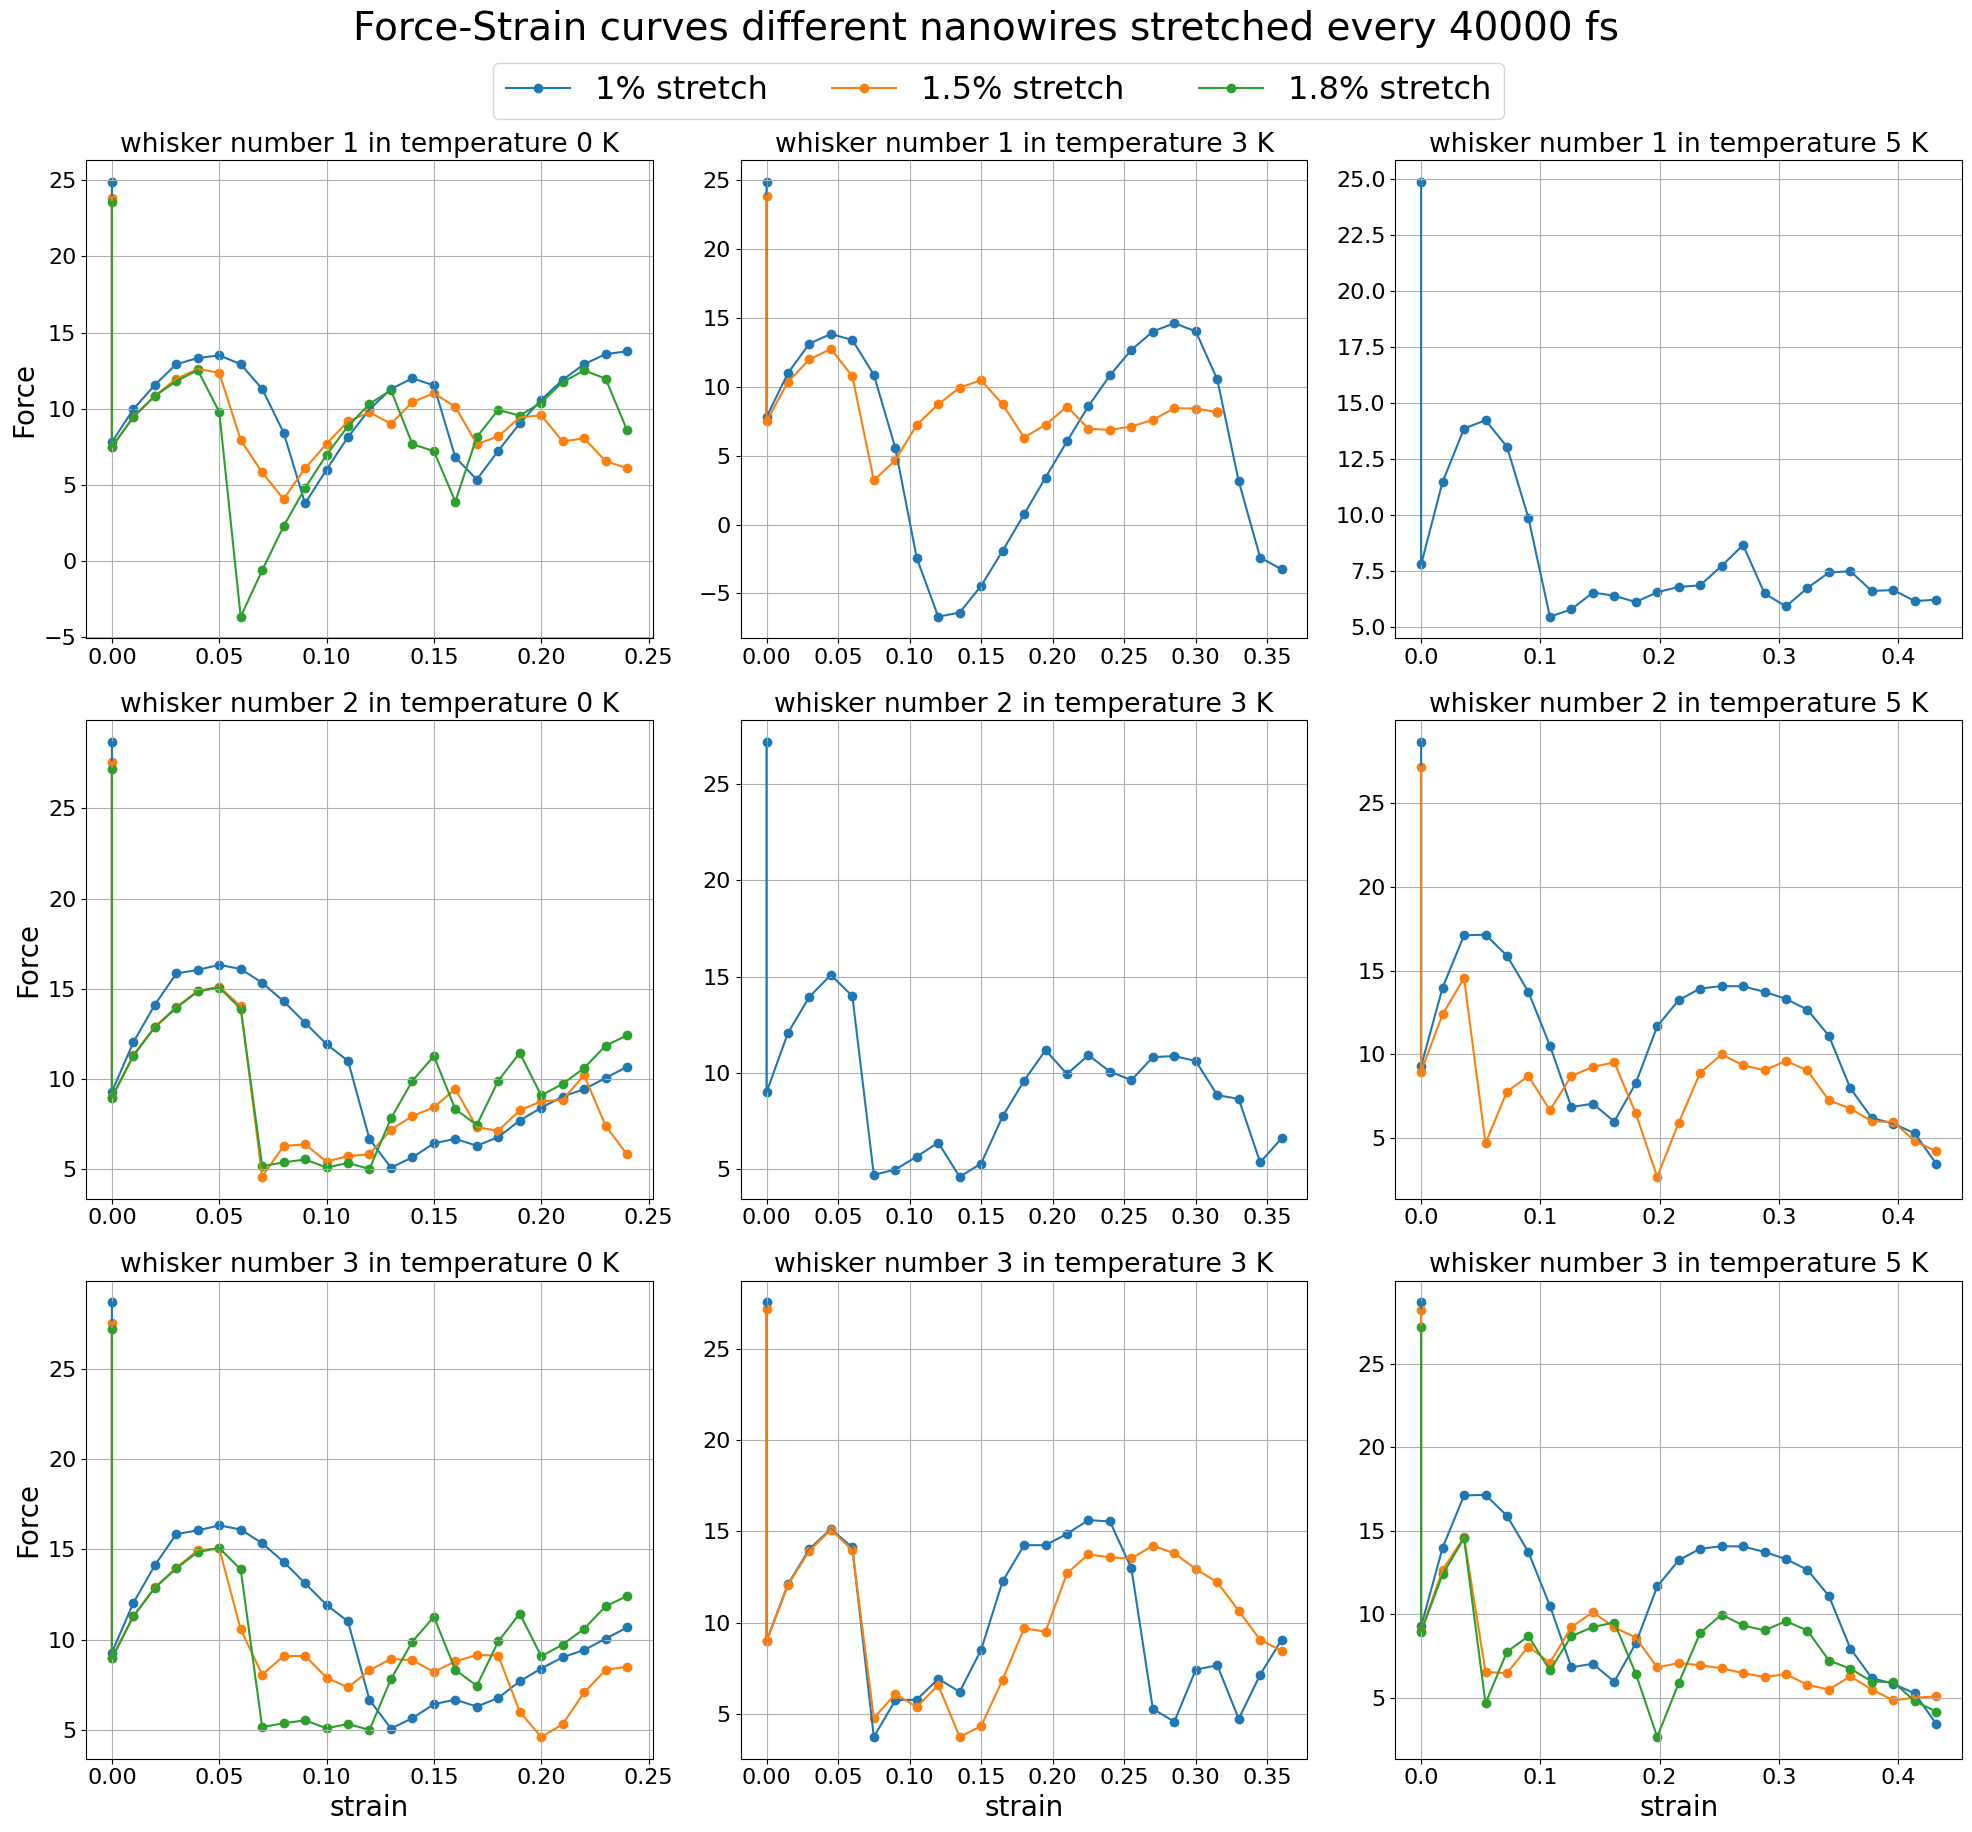

In [115]:
'''
Numbers in this comment have not been used in the plot.
	x		    y		    z		    x \times y
w1	14.425		20.40		57.70		294.27	
w2	23.08		32.64		57.70		753.33
w3	28.85		40.80		57.70		1177.08
'''
fig = plt.figure(figsize=(20,18))
fig.suptitle('Force-Strain curves different nanowires stretched every 40000 fs', 
             fontsize=titlefontsize, y=1.02)

FL, FP = [0, 0, 0], [0, 0, 0]
value, pos, flagged = 0, 1, False
for itx in range(9):
    ax = plt.subplot(3,3,pos); ax.grid(True); pos+=1; 
        
    ax.set_title('whisker number {} in temperature {} K'.format(whisker[int((itx-(itx%3))/3)], 
                                                                temps[itx%3]))
    
    if(itx%3 == 0): ax.set_ylabel('Force', fontsize=axisfontsize)
    if(itx>5): ax.set_xlabel('strain', fontsize=axisfontsize)
        
    for i in range(3):
        if itx+value in [5, 7, 8, 12, 13, 16, 21]: flagged = True
        if not flagged:
            force = v[itx+value].lghst[::2490] - v[itx+value].rghst[::2490]
            FL[i], = ax.plot(v[itx+value].strn[::2490], force)
            FP[i]  = ax.scatter(v[itx+value].strn[::2490], force)
        value+=1; flagged = False
    value-=1
    
fig.legend([(FL[0], FP[0]), (FL[1], FP[1]), (FL[2], FP[2])],
           ['1% stretch', '1.5% stretch ', 
            '1.8% stretch'], loc = (0.25, 0.935), ncol=3, 
           fontsize=legendfontsize, scatteryoffsets = [0.5]) 
        
plt.tight_layout()
plt.savefig('plots/force_strain_curves.png', bbox_inches='tight'); plt.show()

#### m9: Figures - visualization of defects before deformation (elastic region)

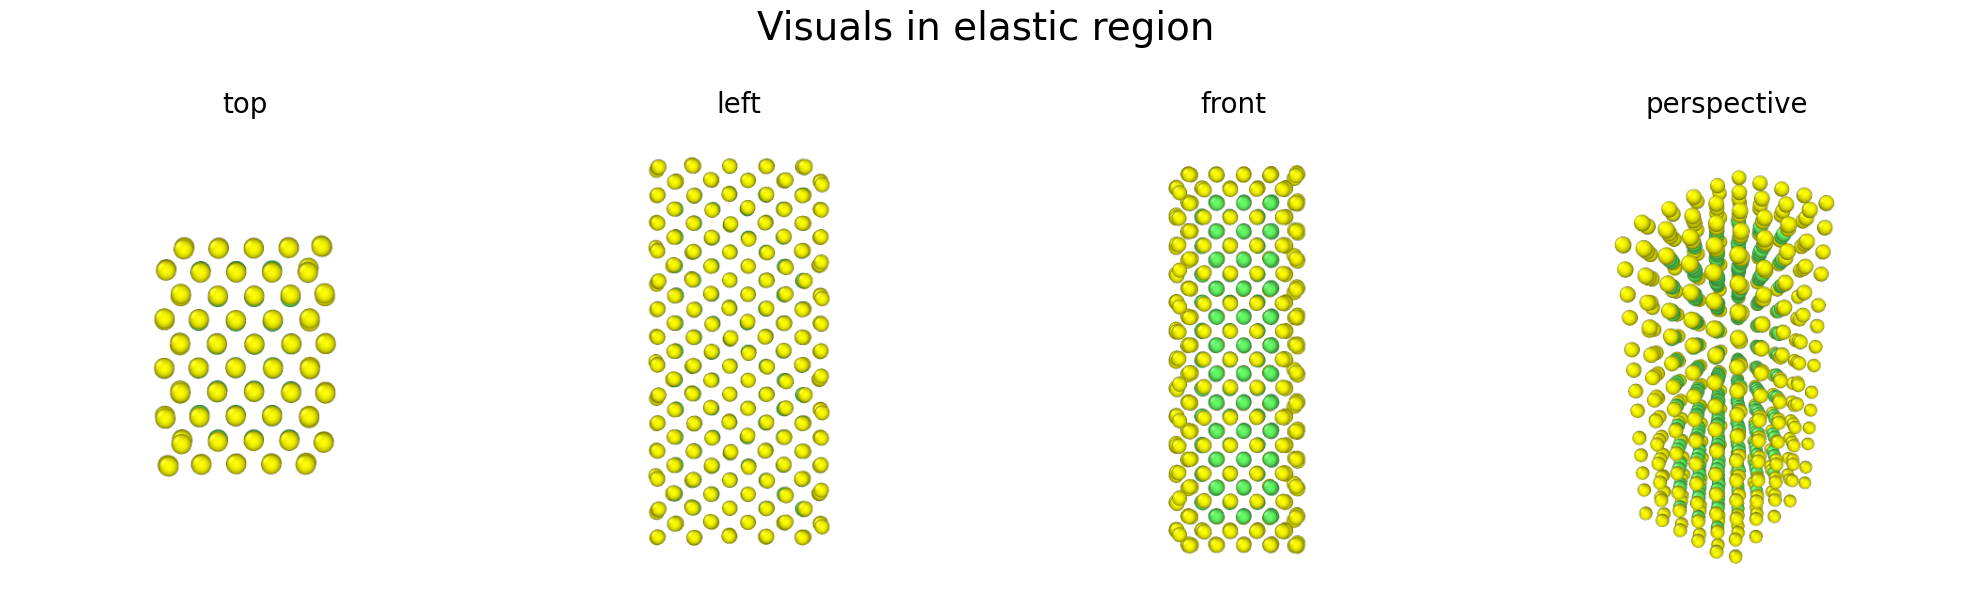

In [116]:
# 51 - 0 viridis x-y axis cutoff radius 4 histogram bins 50
dt, timestep, pos = [0.01, 0.05, 0.1, 0.15], [100, 200, 300, 400], 1

titles = ['top', 'left', 'front', 'perspective']

# m4/images/lj54_0.035_150.png lj54_0.035_500.png
names = ['m9/images/before_stretch_0_top.png', 'm9/images/before_stretch_0_left.png', 
         'm9/images/before_stretch_0_front.png', 'm9/images/before_stretch_0_perspective.png']

fig = plt.figure(figsize=(20,7))
fig.suptitle('Visuals in elastic region', fontsize=titlefontsize, y=0.95)

for itx in range(4):
        ax = plt.subplot(1,4,pos); ax.axis('off'); pos+=1
        
        ax.set_title(titles[itx], fontsize=axisfontsize)
        
        ax.imshow(mpimg.imread(names[itx]))
        
plt.tight_layout()
plt.savefig('plots/before_defects_visuals.png', bbox_inches='tight'); plt.show()

#### m9: Figures - visualization of defects after deformation (plastic region)

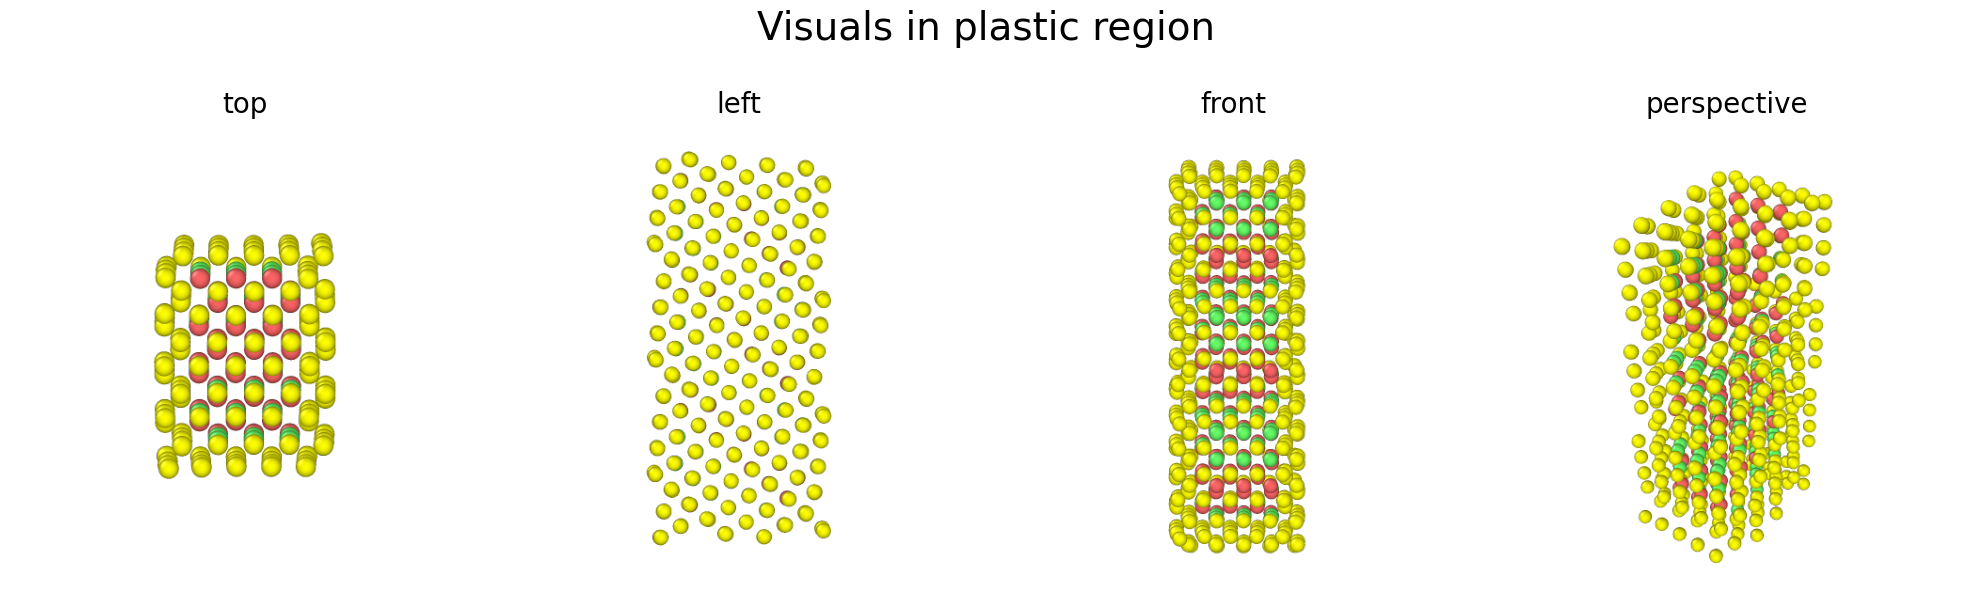

In [117]:
# 51 - 0 viridis x-y axis cutoff radius 4 histogram bins 50
dt, timestep, pos = [0.01, 0.05, 0.1, 0.15], [100, 200, 300, 400], 1

titles = ['top', 'left', 'front', 'perspective']

# m4/images/lj54_0.035_150.png lj54_0.035_500.png
names = ['m9/images/after_stretch_15600_top.png', 'm9/images/after_stretch_15600_left.png', 
         'm9/images/after_stretch_15600_front.png', 'm9/images/after_stretch_15600_perspective.png']

fig = plt.figure(figsize=(20,7))
fig.suptitle('Visuals in plastic region', fontsize=titlefontsize, y=0.95)

for itx in range(4):
        ax = plt.subplot(1,4,pos); ax.axis('off'); pos+=1
        
        ax.set_title(titles[itx], fontsize=axisfontsize)
        
        ax.imshow(mpimg.imread(names[itx]))
        
plt.tight_layout()
plt.savefig('plots/after_defects_visuals.png', bbox_inches='tight'); plt.show()